<a href="https://colab.research.google.com/github/sagar9926/ImportantConcepts-/blob/master/Python/Sigmoid_Neuron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Plotting Sigmoid Function

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import matplotlib.colors
#import seaborn as sns
#sns.set()

$S_{w, b}(x) = \frac{1}{1 + e^{-(wx + b)}}$

In [0]:
def sigmoid(x, w, b):
  return 1/(1 + np.exp(-(w*x + b)))

In [3]:
sigmoid(1,0.5,0)

0.6224593312018546

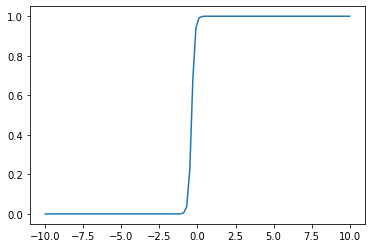

In [4]:
w = 10  #@param {type: "slider", min: -2, max: 10, step: 0.1}
b = 3.8  #@param {type: "slider", min: -5, max: 5, step: 0.1}

X = np.linspace(-10,10,100)
y = sigmoid(X,w,b) # function is called for every element in numpy array

plt.plot(X,y)
plt.show()

# Sigmoid 2D
$S_{w_1, w_2, b}(x_1, x_2) = \frac{1}{1 + e^{-(w_1x_1 + w_2x_2 + b)}}$

In [0]:
def sigmoid_2d(X1,X2,w1,w2,b):
  return(1/(1 + np.exp(-(w1*X1 +w2*X2 + b))))

In [6]:
sigmoid_2d(1, 0, 0.5, 0, 0)

0.6224593312018546

In [7]:
X1 = np.linspace(-10, 10, 100)
X2 = np.linspace(-10, 10, 100)

# we need to find the output y for all possible combination of input

XX1 , XX2 = np.meshgrid(X1,X2)

print(X1.shape,X2.shape,XX1.shape,XX2.shape)

(100,) (100,) (100, 100) (100, 100)


In [8]:
a = np.array([1,2])
b = np.array([3,4])
x,y = np.meshgrid(a,b)
print(x)


[[1 2]
 [1 2]]


In [0]:
w1 = 2
w2 = -0.5
b = 0
Y = sigmoid_2d(XX1, XX2, w1, w2, b)

#Contour plot

In [0]:
import matplotlib.colors
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("",["red","yellow","green"])

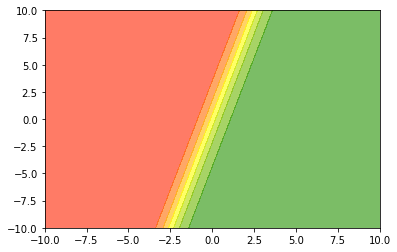

In [11]:
plt.contourf(XX1,XX2,Y,cmap = my_cmap,alpha = 0.6)
plt.show()

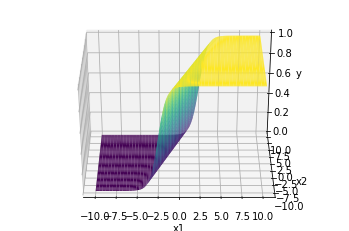

In [12]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(XX1, XX2, Y, cmap='viridis')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

ax.view_init(30, 270)


# Compute Loss for a Given Dataset

In [0]:
w_unknown = 0.5
b_unknown = 0.25

X = np.random.random(25) * 20 - 10
Y = sigmoid(X, w_unknown, b_unknown)

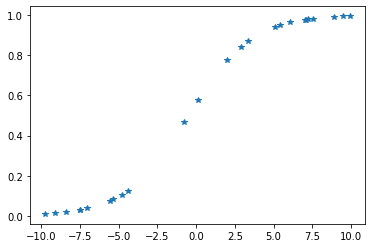

In [14]:
plt.plot(X,Y,"*")
plt.show()

In [0]:
def calculate_loss(X,Y,w_est,b_est):
  loss = 0
  for x,y in zip(X,Y):
    loss += (y - sigmoid(x,w_est,b_est))**2
  return(loss)

In [0]:
W = np.linspace(0,2,100)
B = np.linspace(-1,1,100)

WW,BB = np.meshgrid(W,B)

Loss = np.zeros(WW.shape)

In [17]:
WW.shape

(100, 100)

In [0]:
for i in range(WW.shape[0]):
  for j in range(WW.shape[1]):
    Loss[i][j] = calculate_loss(X, Y, WW[i][j], BB[i][j])
    


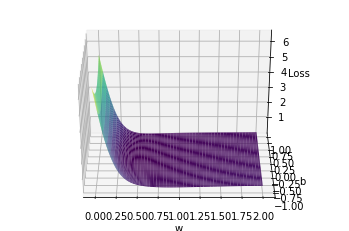

In [19]:
fig = plt.figure()
ax = plt.axes(projection = '3d')
ax.plot_surface(WW,BB,Loss,cmap = 'viridis')
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('Loss')

ax.view_init(30,270)

In [0]:
ij = np.argmin(Loss)
i = int(np.floor(ij/Loss.shape[1]))
j = int(ij - i * Loss.shape[1])

In [21]:
print(i, j)

print(WW[i][j], BB[i][j])

62 25
0.5050505050505051 0.2525252525252526


# Class For Sigmoid Neuron

In [0]:
class SigmoidNeuron:

  def __init__(self):
    self.w = None
    self.b = None



  def perceptron(self,x):
    return((np.dot(x,self.w.T) + self.b))


  def sigmoid(self,x):
    return(1.0/(1.0 + np.exp(-x)))



  def grad_w(self,x,y):
    y_pred = self.sigmoid(self.perceptron(x))
    return((y_pred - y)*y_pred*(1 - y_pred)*x)

  def grad_b(self,x,y):
    y_pred = self.sigmoid(self.perceptron(x))
    return((y_pred - y)*y_pred*(1 - y_pred))

  def fit(self,X,Y,epochs = 1, learning_rate = 1, initialise = True):

    # initialise w and b randomly ( this should not happen every time, if randomly initialised at start of every epoch then there is no learning carried
    # forward from previous epoch )
    if initialise:
      self.w = np.random.randn(1,X.shape[1])  # size = 1 x number of columns
      # X.shape[1] denotes the number of columns and we know that we need weights correspondong to every column
      # shape of weight matrix depends upon the number of paramerers in each iteration of prediction i.e number of columns/ features
      self.b = 0

    for i in range(epochs):
      dw = 0
      db = 0
      for x,y in zip(X,Y) :
      # total gradient is calculated by summing up individual gradients in an epoch
        dw += self.grad_w(x,y) # total gradient is calculated by summing up individual data point gradients
        db += self.grad_b(x,y)
      
      # the number of updates to parameter model is equal to the total number of epochs
      self.w -= learning_rate * dw
      self.b -= learning_rate * db

      








  

# Applying sigmoid neuron on toy data

In [0]:
X = np.asarray([[2.5, 2.5], [4, -1], [1, -4], [-3, 1.25], [-2, -4], [1, 5]])
Y = [1, 1, 1, 0, 0, 0]

In [0]:
sn = SigmoidNeuron()
sn.fit(X, Y, 1, 0.25, True)

In [25]:
print(sn.w,sn.b)

[[ 0.26905839 -0.21805787]] [0.0128795]


In [26]:
for i in range(10):
  print(sn.w,sn.b)
  sn.fit(X,Y,1,0.25,False)

[[ 0.26905839 -0.21805787]] [0.0128795]
[[ 0.47918157 -0.15362482]] [-0.00251509]
[[ 0.58401401 -0.20010201]] [-0.02840316]
[[ 0.66746792 -0.22217649]] [-0.05481834]
[[ 0.73537719 -0.2439133 ]] [-0.08114077]
[[ 0.79418931 -0.26243106]] [-0.10684659]
[[ 0.84635443 -0.27907722]] [-0.13175678]
[[ 0.89347767 -0.29419236]] [-0.15577741]
[[ 0.93657759 -0.30807073]] [-0.17887398]
[[ 0.97636163 -0.32091544]] [-0.20104459]


In [0]:
def plot_sn(X,Y,sn,ax):
  X1 = np.linspace(-10,10,100)
  X2 = np.linspace(-10,10,100)
  XX1,XX2 = np.meshgrid(X1,X2) # these represents all the combinations of X1 and X2 
  # X1 aur X2 me current weight aur bias ka multiply karke hi to apan model nem kya learn kiya hai abata sakte hain 
  YY = np.zeros(XX1.shape) # YY will store the output of model at every instant of X1 and X2
  for i in range(X2.size):
    for j in range(X1.size):
      val = np.asarray([X1[j], X2[i]])
      YY[i][j] = sn.sigmoid(sn.perceptron(val)) #using the weights and biases learned here we find the sigmoid plot that the model is currently like 
  ax.contourf(XX1, XX2, YY, cmap=my_cmap, alpha=0.6)
  ax.scatter(X[:,0], X[:,1],c=Y, cmap=my_cmap) #plotting the positive and negetive scattered points on the sigmoid plot learnt
  ax.plot()



In [32]:
  X1 = np.linspace(-10,10,100)
  X2 = np.linspace(-10,10,100)
  XX1,XX2 = np.meshgrid(X1,X2) # these represents all the combinations of X1 and X2 
  # X1 aur X2 me current weight aur bias ka multiply karke hi to apan model nem kya learn kiya hai abata sakte hain 
  YY = np.zeros(XX1.shape) # YY will store the output of model at every instant of X1 and X2
  for i in range(X2.size):
    for j in range(X1.size):
      val = np.asarray([X1[j], X2[i]])
      print(val)

Streaming output truncated to the last 5000 lines.
[-9.7979798  0.1010101]
[-9.5959596  0.1010101]
[-9.39393939  0.1010101 ]
[-9.19191919  0.1010101 ]
[-8.98989899  0.1010101 ]
[-8.78787879  0.1010101 ]
[-8.58585859  0.1010101 ]
[-8.38383838  0.1010101 ]
[-8.18181818  0.1010101 ]
[-7.97979798  0.1010101 ]
[-7.77777778  0.1010101 ]
[-7.57575758  0.1010101 ]
[-7.37373737  0.1010101 ]
[-7.17171717  0.1010101 ]
[-6.96969697  0.1010101 ]
[-6.76767677  0.1010101 ]
[-6.56565657  0.1010101 ]
[-6.36363636  0.1010101 ]
[-6.16161616  0.1010101 ]
[-5.95959596  0.1010101 ]
[-5.75757576  0.1010101 ]
[-5.55555556  0.1010101 ]
[-5.35353535  0.1010101 ]
[-5.15151515  0.1010101 ]
[-4.94949495  0.1010101 ]
[-4.74747475  0.1010101 ]
[-4.54545455  0.1010101 ]
[-4.34343434  0.1010101 ]
[-4.14141414  0.1010101 ]
[-3.93939394  0.1010101 ]
[-3.73737374  0.1010101 ]
[-3.53535354  0.1010101 ]
[-3.33333333  0.1010101 ]
[-3.13131313  0.1010101 ]
[-2.92929293  0.1010101 ]
[-2.72727273  0.1010101 ]
[-2.52525253  0.1

[[-0.88374441 -0.78712172]] [-0.00214351]
[[-0.57938692 -0.86757009]] [-0.02413184]
[[-0.06937927 -0.97758768]] [-0.02780815]
[[ 0.24674407 -0.94162571]] [0.00546114]
[[ 0.46578782 -0.75542686]] [0.04270287]
[[ 0.75470824 -0.41240737]] [0.07238898]
[[ 0.95356227 -0.17924229]] [0.01449294]
[[ 0.96213759 -0.44319231]] [-0.05509288]
[[ 1.10755343 -0.26997312]] [-0.10728918]
[[ 1.11877082 -0.44907867]] [-0.16521785]
[[ 1.21694073 -0.35245796]] [-0.20870493]
[[ 1.24191019 -0.44311452]] [-0.25346353]
[[ 1.30263849 -0.41537416]] [-0.28983924]
[[ 1.33726646 -0.44915601]] [-0.32504894]
[[ 1.37877478 -0.45320946]] [-0.35633399]
[[ 1.4136336  -0.46749455]] [-0.38562393]
[[ 1.447362   -0.47750075]] [-0.4126558]
[[ 1.47868004 -0.48773292]] [-0.43785723]
[[ 1.50820261 -0.49719247]] [-0.46139499]
[[ 1.53605629 -0.50614462]] [-0.48345745]
[[ 1.56241984 -0.51461604]] [-0.50419765]
[[ 1.58743751 -0.52265581]] [-0.52374866]
[[ 1.61123483 -0.53030414]] [-0.54222565]
[[ 1.63392097 -0.53759608]] [-0.5597288

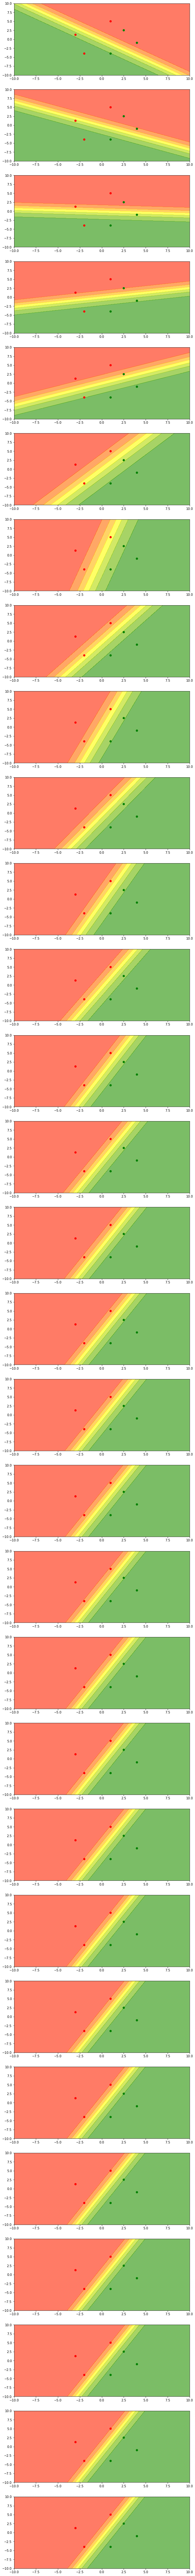

In [31]:
sn.fit(X, Y, 1, 0.05, True)
N = 30
plt.figure(figsize=(10, N*5))
for i in range(N):
  print(sn.w, sn.b)
  ax = plt.subplot(N, 1, i + 1)
  plot_sn(X, Y, sn, ax)
  sn.fit(X, Y, 1, 0.5, False)

In [28]:
X1.size

100